<a href="https://colab.research.google.com/github/ctruciosm/ACA124/blob/main/Problema_Fluxo_Maximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Otimização de redes: O problema do fluxo máximo
## By Prof. Carlos Trucíos

## 1. Introdução à Teoria de Grafos

Um **grafo** consiste num conjunto de pontos e retas conectando certos pares de pontos. Os pontos são chamados **nós** (_nodes_) e as retas são chamadas **arcos/ligações/ramificações/arestas** (_arcs_, _links_, _edges_, _branches_). Os arcos são identificados dando-se nomes aos nós em cada uma das extremidades.



![Figura 1: Exemplo de grafo.](http://163.10.22.82/OAS/estructuras_de_grafos/grafoConexo.1.png)

Por exemplo:

- "ag" é o arco entre os nós "a" e "g".
- "ce" é o arco entre os nós "c" e "e".
- etc.




Os arcos de um grafo podem revelar a direção do **fluxo** de um
ponto para outro.


Grafos são bastante utilizados para entender diversos problemas de programação linear. A seguinte Tabela, extraida de Hillier e Lieberman (2016), apresenta alguns exemplos:


| Nós        | Arcos          | Fluxo     |
|:----------:|:--------------:|:---------:|
| Interseções | Vías          | Veículos  |
| Aeroportos  | Rotas aéreas  | Aeronave  |
| Estações de bombeamento | Tubulação | Fluidos |


- Se o fluxo é apenas permitido em uma direção, o arco é dito **direcionado** (utilizamos uma seta para identificar a direção).
- Se o fluxo é permitido em ambas as direções, o arco é dito **não-direcionado**. Arcos não direcionados são às vezes chamados de ligações.

> Uma **rede** é um grafo com um fluxo de algum tipo nos seus arcos.

### 1.1 Outras terminologias

- Uma rede formada apenas por arcos direcionados é chamada **rede direcionada**.
- Uma rede formada apenas por ligações é chamada de **rede não-direcionada**
- Uma **cadeia** (_chain_) entre os nós $i$ e $j$ é uma sequencia de arcos conectando esses dois nós. Por exemplo, uma **cadeia** conectando os nós "a" e "e" é a seguencia de arcos "ag", "gc" e "ce" (ou vice-versa)- Quando a direção da cadeia é especificada, é chamado de **caminho** (_path_).
- Um **ciclo** (_cycle_) é uma cadeia conectando um nó com ele mesmo. Por exemplo, a cadeia "ag", "gf" e "fa" formam um ciclo.
- Uma rede é dita **rede conectada** se existe uma cadeia conectando cada par de nós. Por exemplo, nosso grafo é conectado, mas não seria se tirássemos os arcos "af", "be", "gc", "fb", "gc" e "bc"
- Uma rede conectada é chamado de **árvore** (_tree_) se não contém ciclos.
- Um nó em uma rede é chamado de **origem** (_source_) se cada um dos seus arcos tem direção tal que o fluxo "sai" do nó.
- Um nó em uma rede é chamado de **escoadouro** (_sink_) se cada um dos seus arcos tem direção tal que o fluxo "entra" no nó.
- A **capacidade do arco** é a quantidade máxima de fluxo que pode ser transportado em um arco direcionado.
- Um **nó de suprimento** tem a propriedade de que o fluxo saindo do nó excede o fluxo entrando no nó.
- Um **nó de demanda** tem a propriedade de que o fluxo que entra no nó excede o fluxo que sai do nó.
- Um **nó intermediário** (_transshipment_) satisfaz a conservação do fluxo, de modo que o fluxo que entra seja igual ao fluxo que sai.


## 1.2 Problema do Fluxo Máximo



Consideremos uma **rede conectada** (_i.e._ uma rede em que existe uma cadeia conectando cada par de nós) com um único nó de **origem** e um único nó de **escoadouro**. Suponhamos que:

- Para cada nó diferente do **origem** e **escoadouro** a **conservaçñao de fluxo** (_i.e._ o fluxo que entra é igual ao fluzo que sai) acontece.
- A taxa de fluxo do arco "ij" (do nó $i$ ao nó $j$) é uma quantidade não negativa menor ou igual à capacidade do arco.

> O **problema de fluxo máximo** consiste em maximizar a quantidade de fluxo de um ponto de origem para um ponto de destino (escoadouro), respeitando as restrições de capacidade de fluxo nos arcos.



Nas palavras do Lachtermacher (2007) "*Estes problemas geralmente envolvem o fluxo de materiais como água, óleo, gás, energia através de uma rede de tubos ou cabos; porém, também podem representar o fluxo máximo de carros em uma malha rodoviária, de produtos em linhas de produção, e assim por diante.*"

### Caso de Estudo

A "BMZ Company" é uma fábrica Europeia de carros de luxo e um dos seus principais mercados são os Estados Unidos. Os carros da BMZ tem-se tornado muito populares na California no último ano e, por isso, é muito importante que o centro de Los Angeles esteja sempre bem equipado com peças para conserto dos carros.

A BMZ precisa executar um plano rapidamente para enviar a maior quantidade de peças da fábrica principal em "Stuttgart" na Alemanhã para "Los Angeles" na California no próximo mês.

Por motivos de produção/sustentabilidade/logistica/etc, a capacidade de envio é limitada e segue a estrutura apresentada na seguinte Figura.


![BMZ](https://raw.githubusercontent.com/ctruciosm/ACA124/main/exemplo_maximal_flow.png)

**Quantas unidades devem ser enviadas através de cada remessa, a fim de maximizar o total de unidades enviadas desde Stuttgar para Los Angeles?**

Para resolver este problema utilizaremos o pacote `igraph`.

In [ ]:
install.packages("igraph")

In [2]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
# Descrevemos o fluxo e as capacidades de cada arco
E = rbind(c("ST", "RO", 50), 
          c("ST", "BO", 70), 
          c("ST", "LI", 40), 
          c("RO", "NY", 60), 
          c("BO", "NY", 40), 
          c("BO", "NO", 50), 
          c("LI", "NO", 30), 
          c("NY", "LA", 80), 
          c("NO", "LA", 70))
colnames(E) = c("From", "To", "capacity") # "capacity" é o único nome que deve aparecer exatamente como escrito aqui
rede = as.data.frame(E)
rede

From,To,capacity
<chr>,<chr>,<chr>
ST,RO,50
ST,BO,70
ST,LI,40
RO,NY,60
BO,NY,40
BO,NO,50
LI,NO,30
NY,LA,80
NO,LA,70


In [4]:
# Fazemos o grafo
g1 = graph_from_data_frame(rede)
g1

IGRAPH 3f8b1bb DN-- 7 9 -- 
+ attr: name (v/c), capacity (e/c)
+ edges from 3f8b1bb (vertex names):
[1] ST->RO ST->BO ST->LI RO->NY BO->NY BO->NO LI->NO NY->LA NO->LA

In [5]:
resultados = max_flow(g1, source = V(g1)["ST"], target = V(g1)["LA"])
resultados

$value
[1] 150

$flow
[1] 50 70 30 50 30 40 30 80 70

$cut
[1] 8 9

$partition1
+ 6/7 vertices, named, from 3f8b1bb:
[1] ST RO BO LI NY NO

$partition2
+ 1/7 vertex, named, from 3f8b1bb:
[1] LA

$stats
$stats$nopush
[1] 8

$stats$norelabel
[1] 2

$stats$nogap
[1] 0

$stats$nogapnodes
[1] 0

$stats$nobfs
[1] 1



A solução ótima pode ser vista através de `resultados$value` e `resultados$flow`.

In [6]:
resultados$value

[1] 150

In [7]:
resultados$flow

[1] 50 70 30 50 30 40 30 80 70

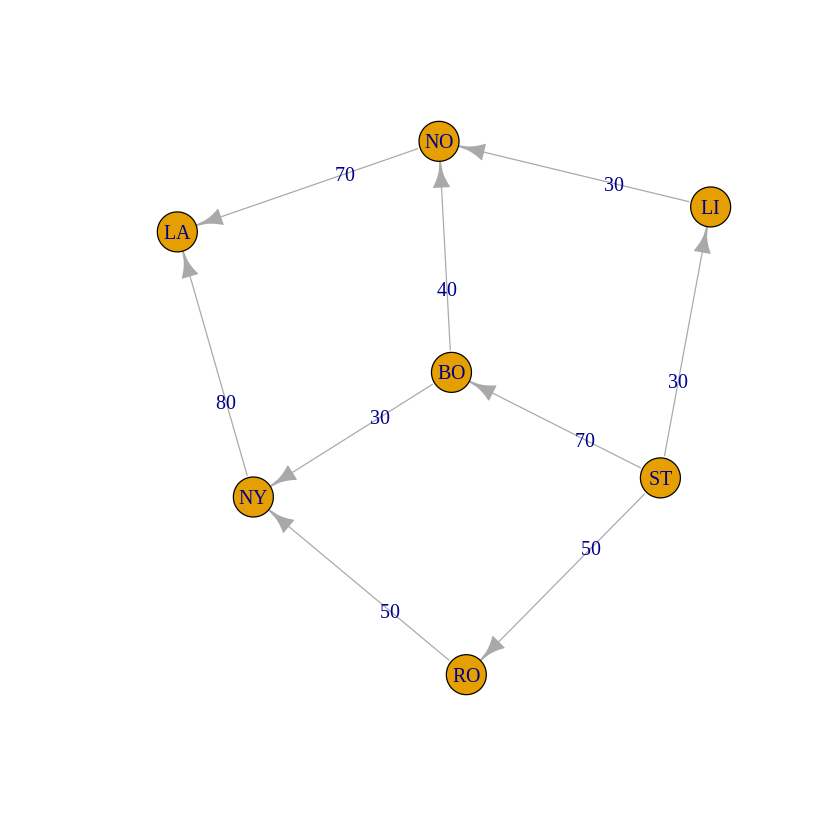

In [8]:
plot(g1, edge.label = resultados$flow)

### Hipóteses

Como em todos os casos vistos anteriormente, cada abordagem apresentada apresentan um conjunto de suposições. No caso do problema do fluxo máximo elas são:

- Todo fluxo atrvés de uma rede direcionada e conectada origana-se em um nó **origem** em termina em um nó **escoadouro**.
- Todos os nós restantes são nós **intermediários**.
- O fluxo através de um arco é apenas perminito na direção indicada pela seta.
- A quantidade máxima do fluxo do arco é dada pela **capacidade** daquele arco.
- O objetivo é **maximizar** a quantitade total de fluxo da **origem** para o **escoadouro**.

### Casos em que problem de fluxo máximo pode ser utilizado

- Maximizar o fluxo de petróleo através de um sistema de tubulações.
- Maximizar o fluxo de água através de um sustema de aquedutos.
- Maximizar o fluxo de veículos através de uma rede de transporte.
- etc

**Observação:** em algumas aplicações, o fluxo através da rede pode-se originar/terminar em mais de um nó. Este caso não se enquadra completamente no problema de fluxo máximo. Contudo, pode-se reformular o problema (origem/escoadouro fantasma) de forma que o problema de adapte ao problema de fluxo máximo

## Caso de Estudo 2

Imagine o seguinte problema (com múltiples origens e escoadouros) descrito na Figura a seguir.

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/exemplo_max_flow2.png)

A problema não se enquadra no **problema do fluxo máximo** pois tem múltiplos origens/escoadouros. Contudo, se utilizarmos origens/escoadouros fantasma podemos reescrever o problema em um problema de fluxo máximo.

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/exemplo_max_flow3.png)

In [9]:
# Descrevemos o fluxo e as capacidades de cada arco
rede = rbind(c("X", "A", 70),
             c("X", "B", 50),
             c("X", "C", 60),
             c("A", "D", 70),
             c("B", "E", 20),
             c("B", "F", 30),
             c("C", "F", 40),
             c("C", "G", 20),
             c("D", "H", 50),
             c("E", "H", 20),
             c("F", "H", 20),
             c("F", "I", 45),
             c("G", "I", 25),
             c("H", "Y", 90),
             c("I", "Y", 70)) 
colnames(rede) = c("De", "Para", "capacity") # "capacity" é o único nome que deve aparecer exatamente como escrito aqui
rede = as.data.frame(rede)
rede

De,Para,capacity
<chr>,<chr>,<chr>
X,A,70
X,B,50
X,C,60
A,D,70
B,E,20
B,F,30
C,F,40
C,G,20
D,H,50


In [10]:
rede_para_grafico = graph_from_data_frame(rede)
rede_para_grafico

IGRAPH 58acdfe DN-- 11 15 -- 
+ attr: name (v/c), capacity (e/c)
+ edges from 58acdfe (vertex names):
 [1] X->A X->B X->C A->D B->E B->F C->F C->G D->H E->H F->H F->I G->I H->Y I->Y

In [11]:
resultados = max_flow(rede_para_grafico, source = V(rede_para_grafico)["X"], target = V(rede_para_grafico)["Y"])
resultados

$value
[1] 155

$flow
 [1] 50 50 55 50 20 30 35 20 50 20 20 45 20 90 65

$cut
[1]  8 12 14

$partition1
+ 8/11 vertices, named, from 58acdfe:
[1] X A B C D E F H

$partition2
+ 3/11 vertices, named, from 58acdfe:
[1] G I Y

$stats
$stats$nopush
[1] 17

$stats$norelabel
[1] 8

$stats$nogap
[1] 4

$stats$nogapnodes
[1] 3

$stats$nobfs
[1] 1



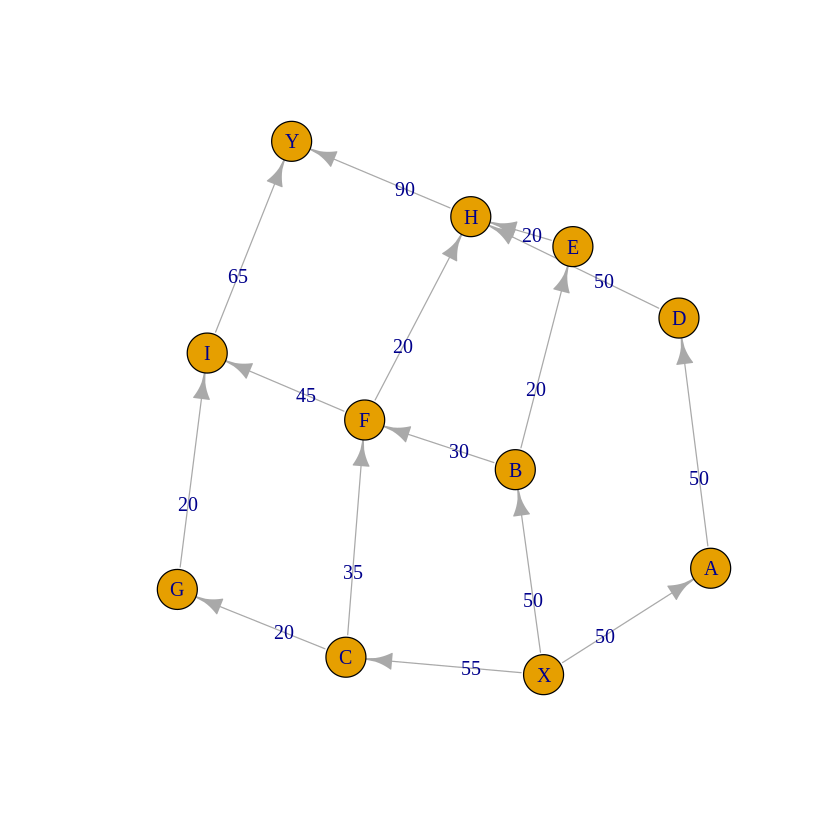

In [12]:
plot(rede_para_grafico, edge.label = resultados$flow)